In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('bmh')

In [ ]:
symbols = ['GEVO', 'SUNW', 'PECK', 'BWEN', 'PLUG', 'SOL', 'RIOT', 'PACB', 'NMCI', 'GRWG' ]
           #'NMCI', 'GRWG']'SUNW'#symbols = ['GEVO', 'SOL', 'SUNW', 'BNGO', 'RIOT', 'PLUG', 'PACB', 'NMCI', 'GRWG']
noa = len(symbols)

In [ ]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',start='2020-01-19',
                               end='2021-01-01')['Adj Close']
data.columns = symbols

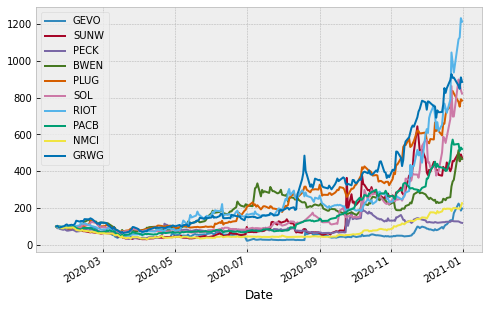

In [ ]:
 (data / data.iloc[0] * 100).plot(figsize=(8, 5))


In [ ]:
#calculating returns to stocks
rets = np.log(data / data.shift(1))
rets.mean() * 252


GEVO    0.715524
SUNW    1.634003
PECK    0.184753
BWEN    1.617026
PLUG    2.163477
SOL     2.212285
RIOT    2.620960
PACB    1.732874
NMCI    0.858543
GRWG    2.290509
dtype: float64

In [ ]:
 #calculating covariance
 rets.cov() * 252


,GEVO,SUNW,PECK,BWEN,PLUG,SOL,RIOT,PACB,NMCI,GRWG
GEVO,3.743601,0.108895,0.282001,0.454295,0.247207,0.431948,0.427759,0.065870,0.181400,-0.009829
SUNW,0.108895,4.522789,2.175232,0.332750,0.273734,0.345479,0.280391,0.107816,0.187510,0.215105
PECK,0.282001,2.175232,2.891645,0.243237,0.367028,0.301950,0.275554,0.154944,0.125861,0.172059
BWEN,0.454295,0.332750,0.243237,1.176348,0.269356,0.389004,0.383130,0.138812,0.132914,0.124411
PLUG,0.247207,0.273734,0.367028,0.269356,0.930912,0.347569,0.466197,0.319484,0.201789,0.442576
SOL,0.431948,0.345479,0.301950,0.389004,0.347569,1.507839,0.400573,0.282378,0.068305,0.238219
RIOT,0.427759,0.280391,0.275554,0.383130,0.466197,0.400573,1.959847,0.343117,0.146279,0.411437
PACB,0.065870,0.107816,0.154944,0.138812,0.319484,0.282378,0.343117,0.707762,0.230158,0.317350
NMCI,0.181400,0.187510,0.125861,0.132914,0.201789,0.068305,0.146279,0.230158,0.868938,0.202623
GRWG,-0.009829,0.215105,0.172059,0.124411,0.442576,0.238219,0.411437,0.317350,0.202623,1.147539


Calculating Weights and Returns for Portfolio

In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights


array([0.18388866, 0.08739516, 0.08176225, 0.00960976, 0.15127331,
       0.08370452, 0.22524946, 0.11038903, 0.06428573, 0.00244212])

In [ ]:
#Expected Portfolio Return
np.sum(rets.mean() * weights) * 252


1.6599262375515562

In [ ]:
#Expected Portfolio Variance
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.5997534968877395

In [ ]:
#Expected Portfolio Volatility
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.7744375358205072

Monte Carlo Simulation Of Portfolio

In [ ]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
                         np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

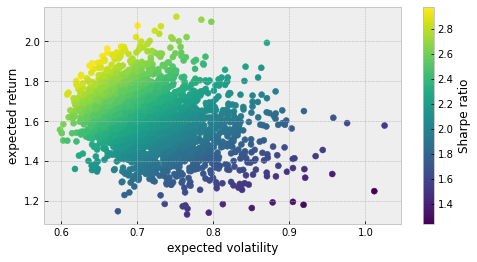

In [ ]:
 #plotting
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

Portfolio Optimization

In [ ]:
#Function for portfolio statistics
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [ ]:
#Maximizing Sharpe Ratio
import scipy.optimize as sco
def min_func_sharpe(weights):
             return -statistics(weights)[2]

In [ ]:
#Constraints, weights must add up to one
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#Weights bound between 0,1
bnds = tuple((0, 1) for x in range(noa))

In [ ]:
#Starting Parameter list for optimization(Equally Weighted)
noa * [1. / noa,]


[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                                bounds=bnds, constraints=cons)

CPU times: user 174 ms, sys: 959 µs, total: 175 ms
Wall time: 181 ms


In [ ]:
#calling function for portfolio statistics
opts

     fun: -3.1022046557978826
     jac: array([ 4.55110341e-01, -1.11660361e-03,  1.75738981e+00, -6.08623028e-04,
        9.89079475e-04,  1.40565634e-03, -2.00867653e-05, -4.15980816e-04,
       -4.71860170e-04, -7.68423080e-04])
 message: 'Optimization terminated successfully.'
    nfev: 141
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([7.88430825e-17, 2.53289180e-02, 8.30200690e-18, 1.18571925e-01,
       1.73793858e-01, 1.34947278e-01, 1.07329126e-01, 2.12251546e-01,
       1.24817394e-02, 2.15295610e-01])

In [ ]:
#optimal portfolio allocation
opts['x'].round(3)

['GEVO', 'SUNW', 'PECK', 'BWEN', 'PLUG', 'SOL', 'RIOT', 'PACB', 'NMCI', 'GRWG' ]

array([0.   , 0.025, 0.   , 0.119, 0.174, 0.135, 0.107, 0.212, 0.012,
       0.215])

In [ ]:
pstats = statistics(opts['x']).round(3)
pstats

array([2.061, 0.664, 3.102])

In [ ]:
print('Expected return',pstats[0])
print('Expected volatility',pstats[1])
print('Optimal Sharpe Ratio',pstats[2])

Expected return 2.061
Expected volatility 0.664
Optimal Sharpe Ratio 3.102


Minimizing Variance of Portfolio

In [ ]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [ ]:
 optv = sco.minimize(min_func_variance, noa * [1. / noa,],
                        method='SLSQP', bounds=bnds,
                        constraints=cons)

In [ ]:
optv

     fun: 0.34264739684456524
     jac: array([0.6839601 , 0.68787383, 0.68694132, 0.68533046, 0.68526966,
       0.68462557, 0.68537359, 0.68537234, 0.68523359, 0.68520708])
 message: 'Optimization terminated successfully.'
    nfev: 102
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.03962468, 0.00909001, 0.04735134, 0.15235783, 0.0677535 ,
       0.07103586, 0.01248146, 0.24299266, 0.23842083, 0.11889182])

In [ ]:
optv['x'].round(3)


array([0.04 , 0.009, 0.047, 0.152, 0.068, 0.071, 0.012, 0.243, 0.238,
       0.119])

In [ ]:
statistics(optv['x']).round(3)


array([1.533, 0.585, 2.619])

Creating the Efficient Frontier

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
         {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [ ]:
#Function to return volatility from statistics function
def min_func_port(weights):
    return statistics(weights)[1]

In [ ]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                      bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 10.8 s, sys: 7.81 ms, total: 10.8 s
Wall time: 10.8 s


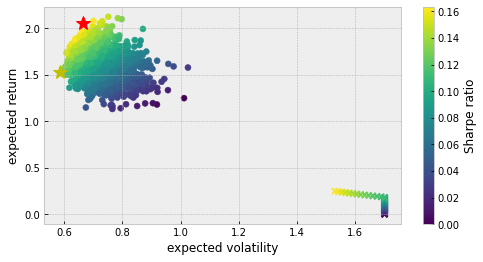

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
# random portfolio composition
plt.scatter(tvols, trets,
             c=trets / tvols, marker='x')
# efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
        'r*', markersize=15.0)
# portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
# minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')